# Logreg-tensorflow1_res


In [1]:
import tensorflow as tf
import numpy as np
X=tf.placeholder(dtype=tf.float32,shape=[None,2])
y=tf.placeholder(dtype=tf.float32,shape=[None,1])
XX=np.array([[4.0,2.0],[3.0,1.0],[5.0,4.0],[6.0,5.0],[1.0,0.0],[0.0,1.0],[2.0,4.0],[1.0,3.0],[3.0,5.0],[5.0,7.0]],dtype=float)
YY=np.array([[0],[0],[0],[0],[0],[1],[1],[1],[1],[1]],dtype=float)




In [0]:
w=tf.Variable(initial_value=[[0.5],[0.5]],dtype=tf.float32)
bias = tf.Variable(initial_value=0.5,dtype=tf.float32)
out=tf.add(tf.matmul(X,w),bias)


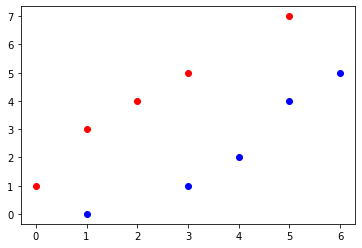

In [3]:
import matplotlib.pyplot as plt
for i in range(len(YY)):
  if YY[i,0]==1:
    plt.plot(XX[i,0],XX[i,1],'ro')
  else:plt.plot(XX[i,0],XX[i,1],'bo')
plt.show()

In [7]:
loss=tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=out)
gradesc=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

epochs=1000


with tf.Session() as sess:

    sess.run(tf.initializers.global_variables())
    for i in range(epochs):
      for k in range(2):
        sess.run(gradesc,feed_dict={X:XX[k*5:(k+1)*5],y:YY[k*5:(k+1)*5]})
        if i%200==0 and k%2==0:print(i,sess.run(loss,feed_dict={X:XX,y:YY}).mean())
     
    print(sess.run(w),sess.run(bias))  
    ye=sess.run(tf.sigmoid(out),feed_dict={X:XX})
 

for i in range(len(ye)):
  if ye[i,0]>0.5:ye[i,0]=1
  else:ye[i,0]=0

ye=ye.reshape((-1,))
from sklearn.metrics import accuracy_score
accuracy_score(ye,YY.reshape((-1,)))

0 1.4136264
200 0.05225588
400 0.028637866
600 0.020057987
800 0.015555876
[[-3.324747 ]
 [ 3.0007548]] 0.18715477


1.0